## Final Project Submission

Please fill out:
* Student name: Jeffrey Ongicho
* Student pace: self paced / part time / full time: full time
* Scheduled project review date/time: 
* Instructor name: Antonny Muiko
* Blog post URL:


# Overview
<div style="text-align:justify;">
<img src="Images/scorese.jpeg">

“Movies touch our hearts and awaken our vision, and change the way we see things. They take us to other places, they open doors and minds. Movies are the memories of our life time, we need to keep them alive.”
― Martin Scorsese

This project is an exploratory data analysis on film data obtained from various sources to hel our company as they venture into the film making industry. The task is to provide insights from the analysis to help the company make decisions on the kind of films to make to maximize profit and audience engagement.

## Business Understanding
The company seeks to enter the movie industry after seeing other big companies make original video content. They decide to create a studio, however they have no idea on the type of movies to create. The task is to determine the type of films currently doing well at the box office and help the company determine the kind of movies to make.
Some of the key business questions to be answered include:
* What genre of films does the best at the box office?
* Is there a correlation between the production budget and the performance of a movie at the box office?
* What is the correlation between movie runtime and the Return of Investment?
* What is the average production budget for films over the years?

By providing actionable insights based on the analysis done, I can help the company determine the type of movies to make and in making informed decisions on marketing and production costs.

## Data Understanding
The data used in this analysis contains data collected from various popular movie sites such as Box Office Mojo, IMDb, rotten tomato reviews. It contains detailed information on movie titles, actors, directors, box office earnings, and movie ratings.



## Data Preparation
Data preparation will involve cleaning our data by removing duplicates, dealing with missing values. Some transformations such as merging, imputation will be done to make our data easier to use. Let's investigate the data that we have.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
%matplotlib inline

In [2]:
# Extract the IMDb database
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('unzippedData/')

In [3]:
# Connect to sqlite
conn = sqlite3.connect('unzippedData/im.db')

In [4]:
# Load the Box Office Mojo data
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
# Load the rotten tomatoes dataset
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep = '\t')
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [6]:
# Load the reviews dataset
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep = '\t', encoding='latin1')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [7]:
# Load the TMB dataset
tmb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')
tmb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [8]:
# Load the Number movie dataset
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
# Select the movie basics and movie ratings table
movie_basics = pd.read_sql("""
SELECT * FROM movie_basics;
""", conn)

movie_ratings = pd.read_sql("""
SELECT * FROM movie_ratings;
""", conn)

In [10]:
# Show the first five rows of the ratings dataframe
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
# show the first five rows of the movie_basics dataframe
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


We choose the movie basics table because it contains information on runtime, the genre of movie, the title and the year. The movie ratings table has the movie ratings and the num of voters which will help in determining the movies currently popular.

In [12]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [13]:
# Check for duplicates
tn_budgets.duplicated().sum()

0

We can see that in the tn_budgets dataframe that the production budget, domestic gross and world wide gross are stored as strings rather than integers which is not right. The dataframe has no missing values or duplicates. Let's begin the cleaning the data.

In [14]:
# remove $ sign, replace commas with an empty string and convert to float datatype

tn_budgets['production_budget'] = tn_budgets['production_budget'].str.strip('$').str.replace(",","").astype(float)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.strip('$').str.replace(",","").astype(float)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.strip('$').str.replace(",","").astype(float)

In [15]:
# Check a description of the numeric columns
tn_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


Now that the columns have been converted to the correct datatype, we can create a column that represents the profit each movie made based on the production budget and worldwide earnings.

In [16]:
# Create a column to show the profit made on each movie
tn_budgets['profit'] = tn_budgets['worldwide_gross'] - tn_budgets['production_budget']
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


Let us see if there's any correlation between production budget and the worldwide gross earnings. We can use a scatterplot for this.

<Axes: xlabel='production_budget', ylabel='worldwide_gross'>

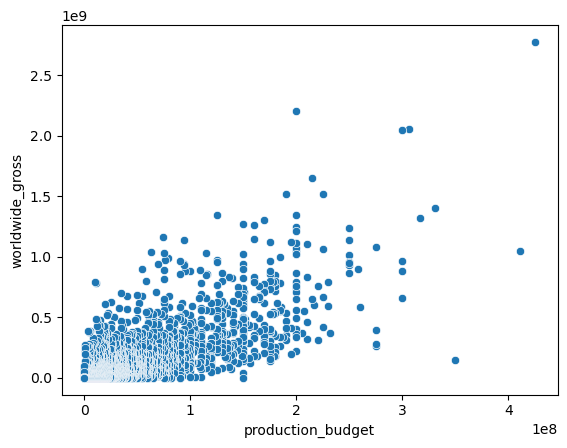

In [17]:
import seaborn as sns
sns.scatterplot(data=tn_budgets, x='production_budget', y='worldwide_gross')

<Axes: xlabel='production_budget', ylabel='profit'>

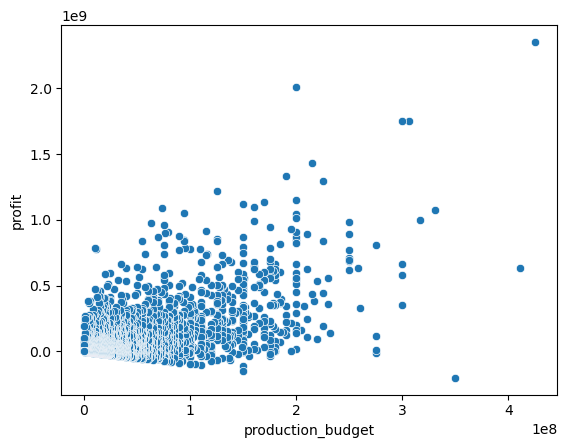

In [18]:
# Plot production budget and profit
sns.scatterplot(data=tn_budgets, x='production_budget', y='profit')

<Axes: xlabel='worldwide_gross', ylabel='profit'>

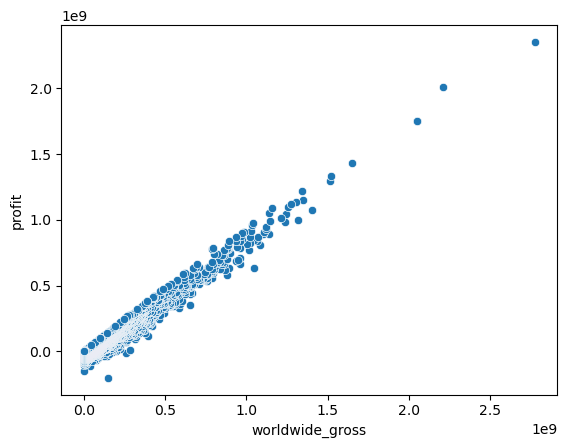

In [19]:
# Plot worldwide gross against profit
sns.scatterplot(data=tn_budgets, x='worldwide_gross', y='profit')

From the scatterplot we can see that there maybe a relationship between the production budget and the world wide gross earnings. Let's use a statistical test specifically pearsons correlation to check if there is a relationship between the two.

The null hypothesis H<sub>0</sub> is that there is no correlation between the production budget and the world wide gross earnings.<br>
The alternative hypothesis H<sub>1</sub> is that there is a correlation between the production budget and the world wide gross earnings.

In [20]:
# Import the pearson correlation coefficient
from scipy.stats import pearsonr

alpha = 0.05

# Test for correlation between the two columns
correlation, p_value = pearsonr(tn_budgets['production_budget'], tn_budgets['worldwide_gross'])
print((correlation, p_value))


(0.7483059765694756, 0.0)


<div style="text-align:justify;">

The correlation value of approximately 0.75 indicates that there is a strong positive relationship between the production budget and the world wide gross earnings. This means the higher the budget the more money the movie makes worldwide. A p value of 0.0 is less than 0.05 which means this is statistically significant and we reject our null hypothesis. The alternative hypothesis which is that there is a correlation between production budget and world wide gross earnings is accepted. <br>

This can serve as the first recommendation that we make to the company. The company should invest a lot of money into making the movie for the movie to perform well at the box office.

In [21]:
# Convert the release date to a datetime datatype
tn_budgets['release_date'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [22]:
# Create a new column year that has the year the movie was released
tn_budgets['year'] = tn_budgets['release_date'].dt.year

We create a new column year to store the year that the movie was released in. This will make it easier down the road when we are trying to join it with the movie basics and ratings dataframes.

In [23]:
tn_budgets['movie'].values.tolist()

['Avatar',
 'Pirates of the Caribbean: On Stranger Tides',
 'Dark Phoenix',
 'Avengers: Age of Ultron',
 'Star Wars Ep. VIII: The Last Jedi',
 'Star Wars Ep. VII: The Force Awakens',
 'Avengers: Infinity War',
 'Pirates of the Caribbean: At Worldâ\x80\x99s End',
 'Justice League',
 'Spectre',
 'The Dark Knight Rises',
 'Solo: A Star Wars Story',
 'The Lone Ranger',
 'John Carter',
 'Tangled',
 'Spider-Man 3',
 'Captain America: Civil War',
 'Batman v Superman: Dawn of Justice',
 'The Hobbit: An Unexpected Journey',
 'Harry Potter and the Half-Blood Prince',
 'The Hobbit: The Desolation of Smaug',
 'The Hobbit: The Battle of the Five Armies',
 'The Fate of the Furious',
 'Superman Returns',
 'Pirates of the Caribbean: Dead Men Tell No Tales',
 'Quantum of Solace',
 'The Avengers',
 'Pirates of the Caribbean: Dead Manâ\x80\x99s Chest',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Amazing Spider-Man',
 'Battleship',
 'Transformers: The Last Knight',
 'Jurassic World

A list of the movie titles from the dataframe is created to store the available titles that have the worldwide earnings. However, this will shrink our data once we merge with the other datasets because some of the titles are not present.

In [24]:
def normalize_text(text):
    return text.replace('â\x80\x99', "'").replace('â\x80\x94', " ").replace('Ã©', "e")

# Apply the function to clean up the movie column
tn_budgets['movie'] = tn_budgets['movie'].apply(lambda x: normalize_text(x))

tn_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,2015
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,2018
7,8,2007-05-24,Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,2007
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,2017
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,2015


In [25]:
# Apply the function created above to normalize the movie titles
title_list = [normalize_text(i) for i in tn_budgets['movie'].values.tolist()]
len(title_list)

5782

In [26]:
# Merge the ratings and movie basics dataframes
movies_merged = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')
movies_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [27]:
movies_merged.info

<bound method DataFrame.info of         movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                  Drømmeland

In [28]:
# Check whether the primary title is in the list of movie titles that was created
movies_merged = movies_merged[movies_merged['primary_title'].isin(title_list) == True]
movies_merged.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
33,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116


Some of the rows have disappeared because the primary title was not part of the list of movie titles that was created above.

In [29]:
tn_budgets['Movie & Year'] = tn_budgets.apply(lambda row: f"{row['movie']} - {row['year']}", axis=1)

# Create a list of target Titles & Years
target_list_with_years = [normalize_text(i) for i in tn_budgets['Movie & Year'].values.tolist()]

# Create Movie & Year column in our IMDB dataframe
movies_merged['Movie & Year'] = movies_merged.apply(lambda row: f"{row['primary_title']} - {row['start_year']}", axis=1)

# Slice our DataFrame to exclude movies not in our target list
movies_merged = movies_merged[movies_merged['Movie & Year'].isin(target_list_with_years) == True]
movies_merged.head()

C:\Users\jeffr\AppData\Local\Temp\ipykernel_17628\998080106.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_merged['Movie & Year'] = movies_merged.apply(lambda row: f"{row['primary_title']} - {row['start_year']}", axis=1)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Movie & Year
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,Foodfight! - 2012
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty - 2013
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones - 2014
52,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World - 2015
54,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary - 2011


In [30]:
# Drop the original_title column
movies_merged.drop(columns=['original_title'], inplace=True)

# Rename the primary_title and start_year columns
movies_merged.rename(columns={'primary_title': 'movie', 'start_year': 'year'}, inplace=True)

<div style="text-align:justify;">
The original title column is dropped because it felt unnecessary to have both original title and primary title within the same dataframe. The primary title column is renamed to movie which matches with our tn_budgets movie column and will ease the process of merging the two dataframes. The start year column is also renamed to match the year column in the tn_budgets dataframe.

In [31]:
# Merge the two dataframes to create one that has earnings information, rating and the runtime
movie_combined = tn_budgets.merge(movies_merged, on=['movie', 'year', 'Movie & Year'], how='inner')
movie_combined.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,Movie & Year,movie_id,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,Pirates of the Caribbean: On Stranger Tides - ...,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,Dark Phoenix - 2019,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,Avengers: Age of Ultron - 2015,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,2018,Avengers: Infinity War - 2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,2017,Justice League - 2017,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135


In [32]:
movie_combined.to_csv('combined_data.csv', index=False)

We export our newly formed dataframe to a csv file that will be used in visualization.

In [33]:
# Load the newly created combined_data.csv file
combined_df = pd.read_csv('combined_data.csv')
combined_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,year,Movie & Year,movie_id,runtime_minutes,genres,averagerating,numvotes
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,2011,Pirates of the Caribbean: On Stranger Tides - ...,tt1298650,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,2019,Dark Phoenix - 2019,tt6565702,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,2015,Avengers: Age of Ultron - 2015,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,2018,Avengers: Infinity War - 2018,tt4154756,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,2017,Justice League - 2017,tt0974015,120.0,"Action,Adventure,Fantasy",6.5,329135


In [34]:
# Drop the id and Movie & Year columns
combined_df.drop(columns=['Movie & Year', 'id'], inplace=True)

In [35]:
# Check the movies with the highest gross profit
highest_profit_movies = combined_df[['movie', 'profit']].sort_values(
                         ['profit'], ascending=False).head(5)
highest_profit_movies

,movie,profit
3,Avengers: Infinity War,1.748134e+09
23,Jurassic World,1.433855e+09
46,Furious 7,1.328723e+09
18,The Avengers,1.292936e+09
27,Black Panther,1.148258e+09


<div style="text-align: justify;">
We drop the 'Movie &  Year' and id columns because they will not be necessary in our analysis. After checking the top 5 films in terms of profit, it is seen that Avengers: Infinity War earned the highest gross profit among the movies we have.

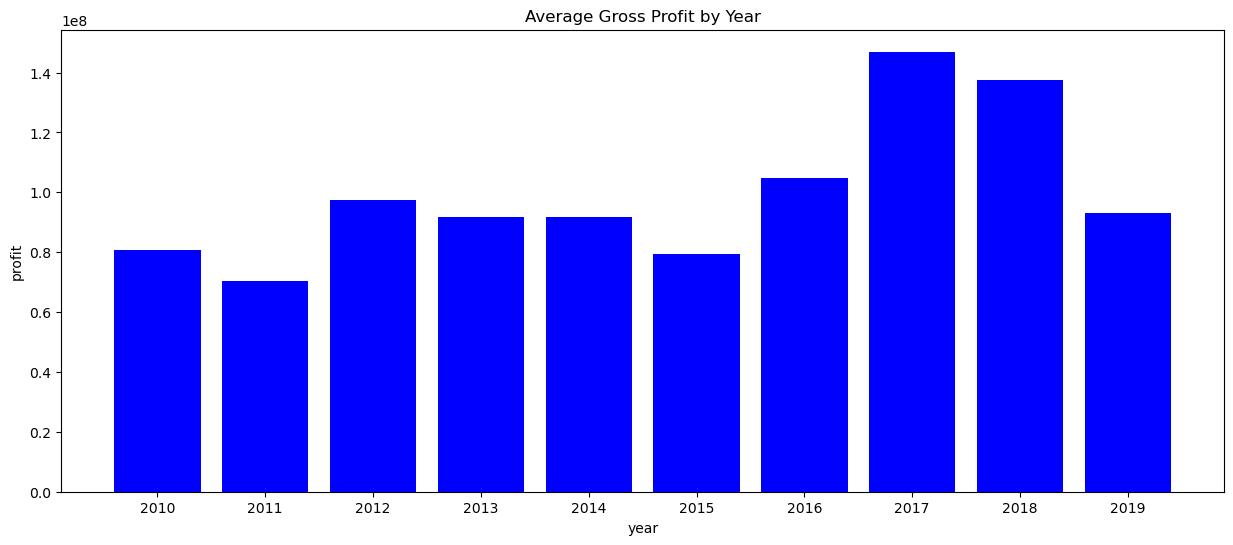

In [36]:
# Plot for average annual profit
annual_profit = combined_df[['year', 'profit']].groupby('year').mean()

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(annual_profit.index, annual_profit['profit'], color='blue')

ax.set_xlabel('year')
ax.set_xticks(annual_profit.index)

ax.set_ylabel('profit')

ax.set_title('Average Gross Profit by Year')

plt.show()

From the graph, the annual gradually increases every year which suggests that more people are watching movies every year. There is a slight decline in 2019 but this could be because of not having enough data on the movies released in 2019.

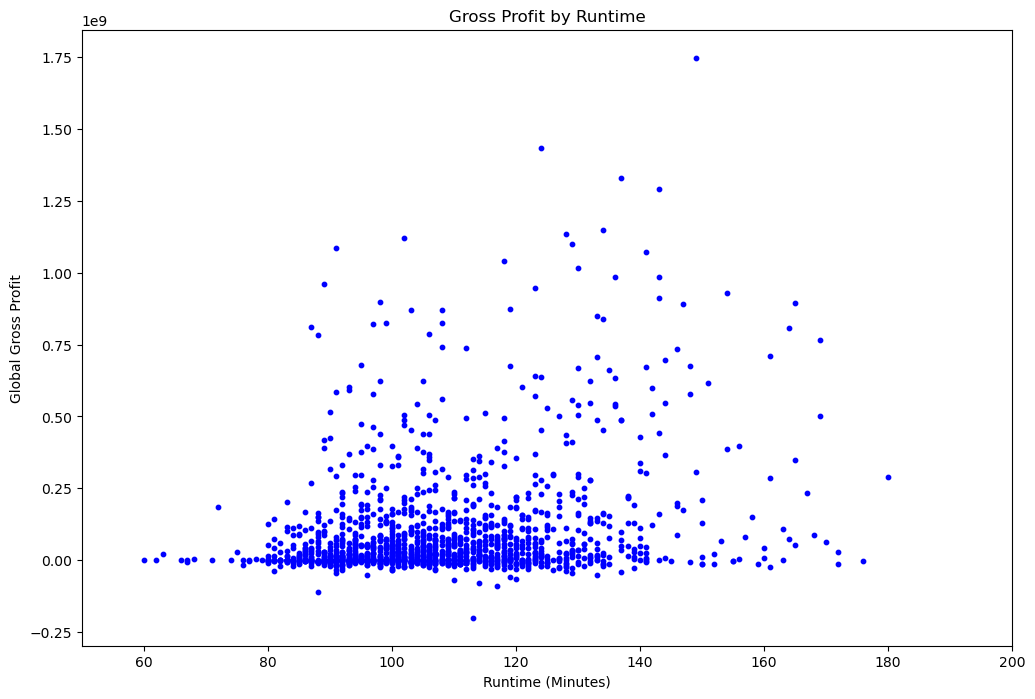

In [37]:
# Plot a scatter plot of the run time and profit
runtime_profit = combined_df[['runtime_minutes', 'profit']]
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(runtime_profit['runtime_minutes'], runtime_profit['profit'], s=10, color='blue')
ax.set_xlabel('Runtime (Minutes)')
ax.set_xlim(50, 200)
ax.set_ylabel('Global Gross Profit')
ax.set_title('Gross Profit by Runtime')

plt.show()

<div style="text-align:justify;">
A scatterplot is used to check if there is any possible relationship between the runtime of a movie and the profit it garners. The datapoint are heavily scattered which means that there is large variance of profit for a given runtime. In general however there does seem to be a positive relationship between the runtime of a movie and the profit it garners i.e. longer movies generate more profit. The relationship does not seem to be strong though. There are some outliers where a large profit is garnered for a movie with a shorter runtime. 

In [38]:
# Check for missing values
runtime_profit.isna().sum()

runtime_minutes    8
profit             0
dtype: int64

In [39]:
# Drop missing values
runtime_profit.dropna(subset=['runtime_minutes'], inplace=True)

C:\Users\jeffr\AppData\Local\Temp\ipykernel_17628\21880262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_profit.dropna(subset=['runtime_minutes'], inplace=True)


<div style="text-align: justify;">
There were 8 missing values of runtime and I ultimately decided to drop the rows where the runtime was missing. Using the mean to fill missing values was an option however in this scenario movies have varying runtime and using the mean would not have been ideal. The missing values were very few and it will not significantly alter our data.

Since the scatterplot did not give a clear indication of the relationship between runtime and profit we use t-test to check whether the mean runtime of profitable movies is different than the mean runtime of unprofitable movies.<br>

The Null Hypothesis H<sub>0</sub> is that the mean runtime of profitable movies is the same as the mean runtime of unprofitable movies.
The Alternative Hypothesis H<sub>1</sub> is that the mean runtime of profitable movies is different than the mean runtime of unprofitable movies

In [40]:
# Create two dataframes; one for profit and one for movies that did not make profit or went at a loss
profitable_movies = runtime_profit.loc[runtime_profit['profit'] > 0]
unprofitable_movies = runtime_profit.loc[runtime_profit['profit'] <= 0]

In [41]:
# Check the shape of the profitable movies dataframe
profitable_movies.shape

(1070, 2)

In [42]:
# Check the shape of the unprofitable movies dataframe
unprofitable_movies.shape

(448, 2)

In [43]:
# Create a dataframe with only the runtime of profitable and unprofitable movies
profitable_runtime= profitable_movies['runtime_minutes']
unprofitable_runtime = unprofitable_movies['runtime_minutes']

In [44]:
# Perform t-test
from scipy import stats

alpha = 0.05
t_stat, p_value = stats.ttest_ind(profitable_runtime, unprofitable_runtime, equal_var=False)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 7.102026610276013
p-value: 2.5696448080560367e-12


From the t-test, the p-value is 2.5696448080560367e-12 which is much lower than our alpha value of 0.05. We reject the null hypothesis and accept the alternative hypothesis that the mean runtime for profitable movies is different from the mean runtime of unprofitable movies. Let's see if there is any correlation between the runtime and profit.

In [45]:
# Use Pearson correlation 
corr = runtime_profit['runtime_minutes'].corr(runtime_profit['profit'])
corr

0.2809603159414145

The coefficent value is 0.2809603159414145 which indicates a positive relationship between the runtime and profit garnered by a movie. However, it is a weak positive relationship which means that there are factors that influence profit like marketing, production budget e.t.c

In [46]:
# Create a dataframe for production budget and profit
production_profit = combined_df[['production_budget', 'profit']]

The correlation between the production budget and profit is calculated to see if there is a relationship between the two variables.

In [47]:
# Use pearson correlation
correlation_value = production_profit['production_budget'].corr(production_profit['profit'])
correlation_value

0.6614648382338982

The correlation value of 0.6614648382338982 indicates a strong positive correlation between the production budget and the profit a movie makes. The higher the production budget is the more gross profit the movie makes.

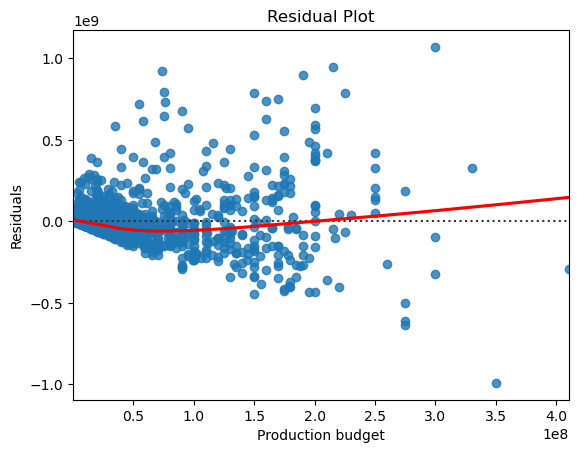

In [48]:
X = production_profit['production_budget']
y = production_profit['profit']

# Plot residual plot
sns.residplot(x=X, y=y ,lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot')
plt.xlabel('Production budget')
plt.ylabel('Residuals')
plt.show()

From the residual plot, we see that there is a large spread in residuals with increase in production budget which is heteroscedasticity and means that linear regression may not be ideal in making future predictions on profits based on production budget

In [49]:
genres_opened = combined_df[['movie', 'genres', 'profit', 'production_budget']].copy()

# Fill null values to apply lambda function
genres_opened['genres'] = genres_opened['genres'].fillna("")

# Use .apply to parse the elements into a list
genres_opened['genres'] = genres_opened['genres'].apply(lambda x: x.split(","))

# Use .explode to pull out indvidual genres
genres_opened = genres_opened.explode('genres')

# Remove null genres
genres_opened = genres_opened[genres_opened['genres'] != ""]

# Remove single instance of 'News' genre that leads to outlier in analysis
genres_opened = genres_opened[genres_opened['genres'] != "News"]

genres_opened.head(10)

,movie,genres,profit,production_budget
0,Pirates of the Caribbean: On Stranger Tides,Action,6.350639e+08,410600000.0
0,Pirates of the Caribbean: On Stranger Tides,Adventure,6.350639e+08,410600000.0
0,Pirates of the Caribbean: On Stranger Tides,Fantasy,6.350639e+08,410600000.0
1,Dark Phoenix,Action,-2.002376e+08,350000000.0
1,Dark Phoenix,Adventure,-2.002376e+08,350000000.0
1,Dark Phoenix,Sci-Fi,-2.002376e+08,350000000.0
2,Avengers: Age of Ultron,Action,1.072414e+09,330600000.0
2,Avengers: Age of Ultron,Adventure,1.072414e+09,330600000.0
2,Avengers: Age of Ultron,Sci-Fi,1.072414e+09,330600000.0
3,Avengers: Infinity War,Action,1.748134e+09,300000000.0


In our genres column, some rows contain multiple genres, we use .explode in pandas to ensure each row contains only one genre which will make it ideal to visualize the performance of each genre in the box office.

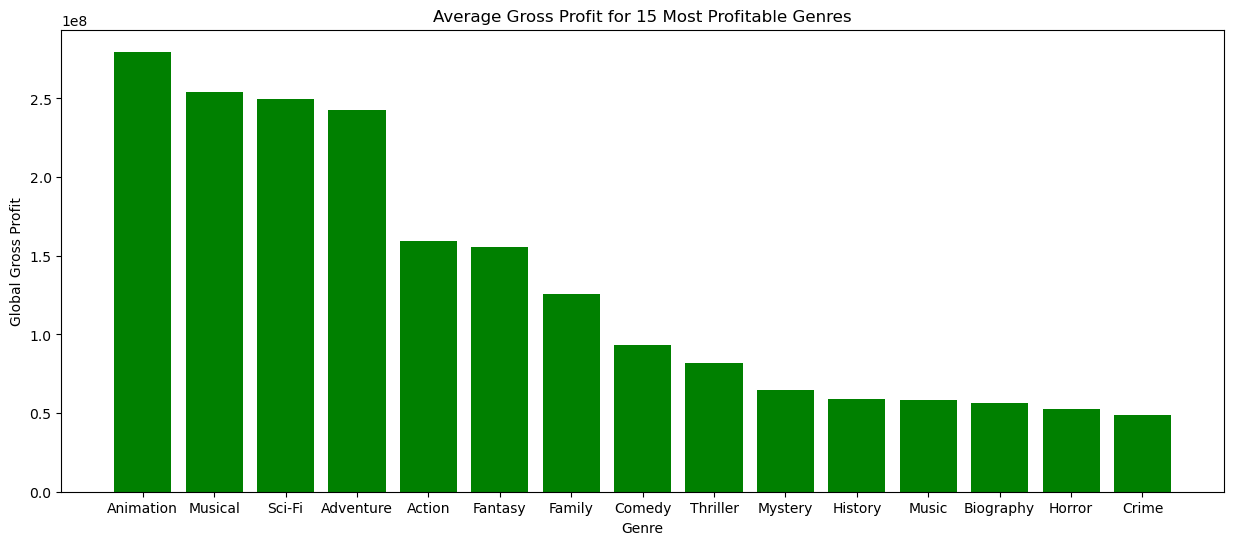

In [50]:
# Group by genre and get the avergae profit per genre
avg_profit_by_genre = genres_opened.groupby('genres')['profit'].mean().sort_values(ascending=False).head(15)
# Plot bar graph for top 15 genres
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(avg_profit_by_genre.index, avg_profit_by_genre.values, color='green')
ax.set_xlabel('Genre')
ax.set_ylabel('Global Gross Profit')
ax.set_title('Average Gross Profit for 15 Most Profitable Genres')

plt.show()


The graphs show that movies that were animations garnered the most profit with musicals, sci-fi, adventure and action rounding the top 5 genres.

## Evaluation
Based on the above analysis, I have 3 recommendations for the company as they seek to enter film making industry. The analysis yielded key details on the genre of films popular at the box office, how production budget affects profit, and the how film runtime affects the profit garnered in the box office. 

However the recommendations drawn from this analysis should be considered alongside other factors like marketing to ensure the company makes the best decision as it ventures into movie making.

## Conclusion
I have drawn recommendations from this analysis that I believe will guide the company as it enters the film making industry. 

### Recommendations
The following are recommendations drawn from the analysis done:
1.  The company should have a sizeable production budget when creating the films. There was a strong positive relationship between production budget and the global gross profit of a film. More money towards production would lead to higher production quality in terms of graphics and cinematography drawing in more viewers.
2. The company should make movies of a longer runtime. Whilst there some isolated scenarios where short films still earned a hefty global gross profit, I found a general trend of profit increasing for longer runtime.
3. The company should make movies that are animations as that was the genre that had the highest average global gross profit of all genres. Action, adventure, musicals and scientific fiction should also be considered as they also had good performance at the box office.